# Chronic Kidney Disease: Clustering & Prediction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings(action='ignore')

## Pre-processing

### A bit of exploration

In [3]:
data = pd.read_csv('../datasets/kidney_disease.csv')
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [5]:
for i in data.drop("id",axis=1).columns:
    print('unique values in "{}":\n'.format(i),data[i].unique())

unique values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in "bp":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in "sg":
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in "al":
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in "su":
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in "rbc":
 [nan 'normal' 'abnormal']
unique values in "pc":
 ['normal' 'abnormal' nan]
unique values in "pcc":
 ['notpresent' 'present' nan]
unique values in "ba":
 ['notpresent' 'present' nan]
unique values in "bgr":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [7]:
data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


### Data Cleaning

In [8]:
for i in range(data.shape[0]):
    if data.iloc[i,25]=='ckd\t':
        data.iloc[i,25]='ckd'
    if data.iloc[i,20] in [' yes','\tyes']:
        data.iloc[i,20]='yes'
    if data.iloc[i,20]=='\tno':
        data.iloc[i,20]='no'
    if data.iloc[i,21]=='\tno':
        data.iloc[i,21]='no'
    if data.iloc[i,16]=='\t?':
        data.iloc[i,16]=np.nan
    if data.iloc[i,16]=='\t43':
        data.iloc[i,16]='43'
    if data.iloc[i,17]=='\t?':
        data.iloc[i,17]=np.nan
    if data.iloc[i,17]=='\t6200':
        data.iloc[i,17]= '6200'
    if data.iloc[i,17]=='\t8400':
        data.iloc[i,17]= '6200'
    if data.iloc[i,18]=='\t?':
        data.iloc[i,18]=np.nan
    if data.iloc[i,25]=='ckd':
        data.iloc[i,25]='yes'
    if data.iloc[i,25]=='notckd':
        data.iloc[i,25]='no'

In [9]:
data.drop("id", axis=1, inplace=True)
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,yes
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,yes
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,yes
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,yes
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,yes


In [10]:
feature_names=['Age (yrs)','Blood Pressure (mm/Hg)','Specific Gravity','Albumin','Sugar','Red Blood Cells',
               'Pus Cells','Pus Cell Clumps','Bacteria','Blood Glucose Random (mgs/dL)','Blood Urea (mgs/dL)',
               'Serum Creatinine (mgs/dL)','Sodium (mEq/L)','Potassium (mEq/L)','Hemoglobin (gms)','Packed Cell Volume',
               'White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)','Hypertension','Diabetes Mellitus',
               'Coronary Artery Disease','Appetite','Pedal Edema','Anemia','Chronic Kidney Disease']
data.columns=feature_names

In [11]:
for i in data.columns:
    print("unique values in {}:\n".format(i),data[i].unique())

unique values in Age (yrs):
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in Blood Pressure (mm/Hg):
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in Specific Gravity:
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in Albumin:
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in Sugar:
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in Red Blood Cells:
 [nan 'normal' 'abnormal']
unique values in Pus Cells:
 ['normal' 'abnormal' nan]
unique values in Pus Cell Clumps:
 ['notpresent' 'present' nan]
unique values in Bacteria:
 ['notpresent' 'present' nan]
unique values in Blood Glucose Random (mgs/dL):
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99.

In [12]:
mistyped=['Packed Cell Volume','White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)']
numeric=[]
for i in data.columns:
    if data[i].dtype=='float64':
        numeric.append(i)
numeric=numeric+mistyped

In [13]:
for col in mistyped:
        data[col]=data[col].astype('float')

In [14]:
print(data['Packed Cell Volume'].unique())
print(data['White Blood Cells (cells/cmm)'].unique())
print(data['Red Blood Cells (millions/cmm)'].unique())

[44. 38. 31. 32. 35. 39. 36. 33. 29. 28. nan 16. 24. 37. 30. 34. 40. 45.
 27. 48. 52. 14. 22. 18. 42. 17. 46. 23. 19. 25. 41. 26. 15. 21. 43. 20.
 47.  9. 49. 50. 53. 51. 54.]
[ 7800.  6000.  7500.  6700.  7300.    nan  6900.  9600. 12100.  4500.
 12200. 11000.  3800. 11400.  5300.  9200.  6200.  8300.  8400. 10300.
  9800.  9100.  7900.  6400.  8600. 18900. 21600.  4300.  8500. 11300.
  7200.  7700. 14600.  6300.  7100. 11800.  9400.  5500.  5800. 13200.
 12500.  5600.  7000. 11900. 10400. 10700. 12700.  6800.  6500. 13600.
 10200.  9000. 14900.  8200. 15200.  5000. 16300. 12400. 10500.  4200.
  4700. 10900.  8100.  9500.  2200. 12800. 11200. 19100. 12300. 16700.
  2600. 26400.  8800.  7400.  4900.  8000. 12000. 15700.  4100.  5700.
 11500.  5400. 10800.  9900.  5200.  5900.  9300.  9700.  5100.  6600.]
[5.2 nan 3.9 4.6 4.4 5.  4.  3.7 3.8 3.4 2.6 2.8 4.3 3.2 3.6 4.1 4.9 2.5
 4.2 4.5 3.1 4.7 3.5 6.  2.1 5.6 2.3 2.9 2.7 8.  3.3 3.  2.4 4.8 5.4 6.1
 6.2 6.3 5.1 5.8 5.5 5.3 6.4 5.7 5.9 6

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age (yrs)                       391 non-null    float64
 1   Blood Pressure (mm/Hg)          388 non-null    float64
 2   Specific Gravity                353 non-null    float64
 3   Albumin                         354 non-null    float64
 4   Sugar                           351 non-null    float64
 5   Red Blood Cells                 248 non-null    object 
 6   Pus Cells                       335 non-null    object 
 7   Pus Cell Clumps                 396 non-null    object 
 8   Bacteria                        396 non-null    object 
 9   Blood Glucose Random (mgs/dL)   356 non-null    float64
 10  Blood Urea (mgs/dL)             381 non-null    float64
 11  Serum Creatinine (mgs/dL)       383 non-null    float64
 12  Sodium (mEq/L)                  313 

In [16]:
categoricals=[]
for col in data.columns:
    if not col in numeric:
        categoricals.append(col)
categoricals.remove('Chronic Kidney Disease')

In [17]:
categoricals

['Red Blood Cells',
 'Pus Cells',
 'Pus Cell Clumps',
 'Bacteria',
 'Hypertension',
 'Diabetes Mellitus',
 'Coronary Artery Disease',
 'Appetite',
 'Pedal Edema',
 'Anemia']

### Further Exploration

In [19]:
import matplotlib.style as style
style.use('fivethirtyeight')

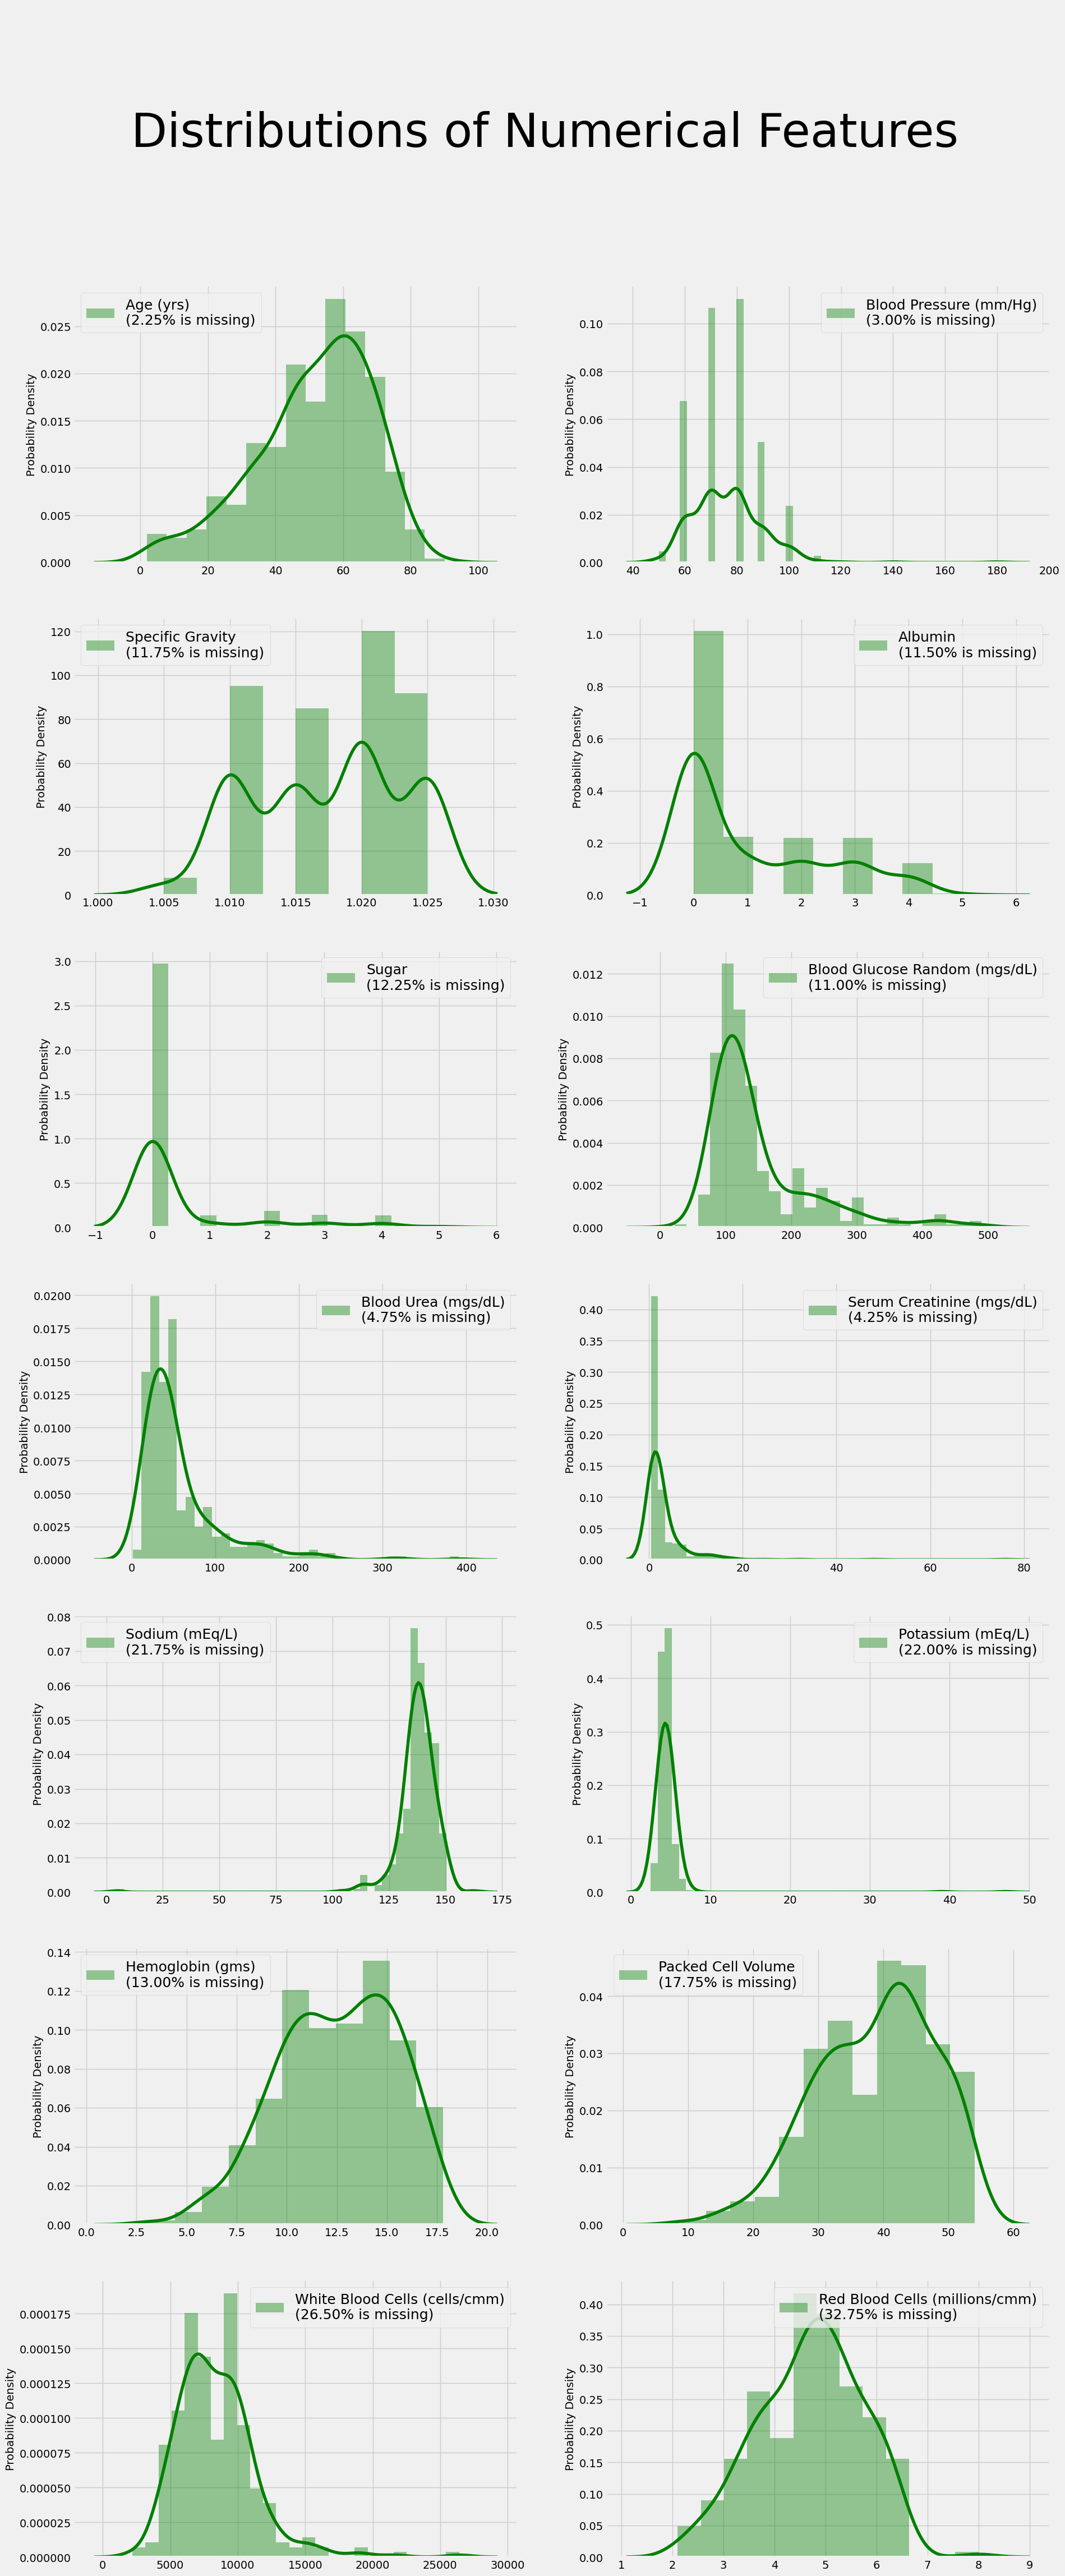

In [21]:
n_rows, n_cols = (7,2)
figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20,50))
figure.suptitle('\n\nDistributions of Numerical Features', fontsize=60)

for index, column in enumerate(numeric):

    i, j = (index // n_cols), (index % n_cols)

    miss_perc = "%.2f"%(100*(1-(data[column].dropna().shape[0])/data.shape[0]))

    collabel=column+"\n({}% is missing)".format(miss_perc)
    
    fig=sns.distplot(data[column], color="g", label=collabel, norm_hist=True,
    
    ax=axes[i,j], kde_kws={"lw":4})
    
    fig=fig.legend(loc='best', fontsize=18)
    
    axes[i,j].set_ylabel("Probability Density",fontsize='medium')
    
    axes[i,j].set_xlabel(None)

plt.show()

In [22]:
style.use('seaborn-darkgrid')

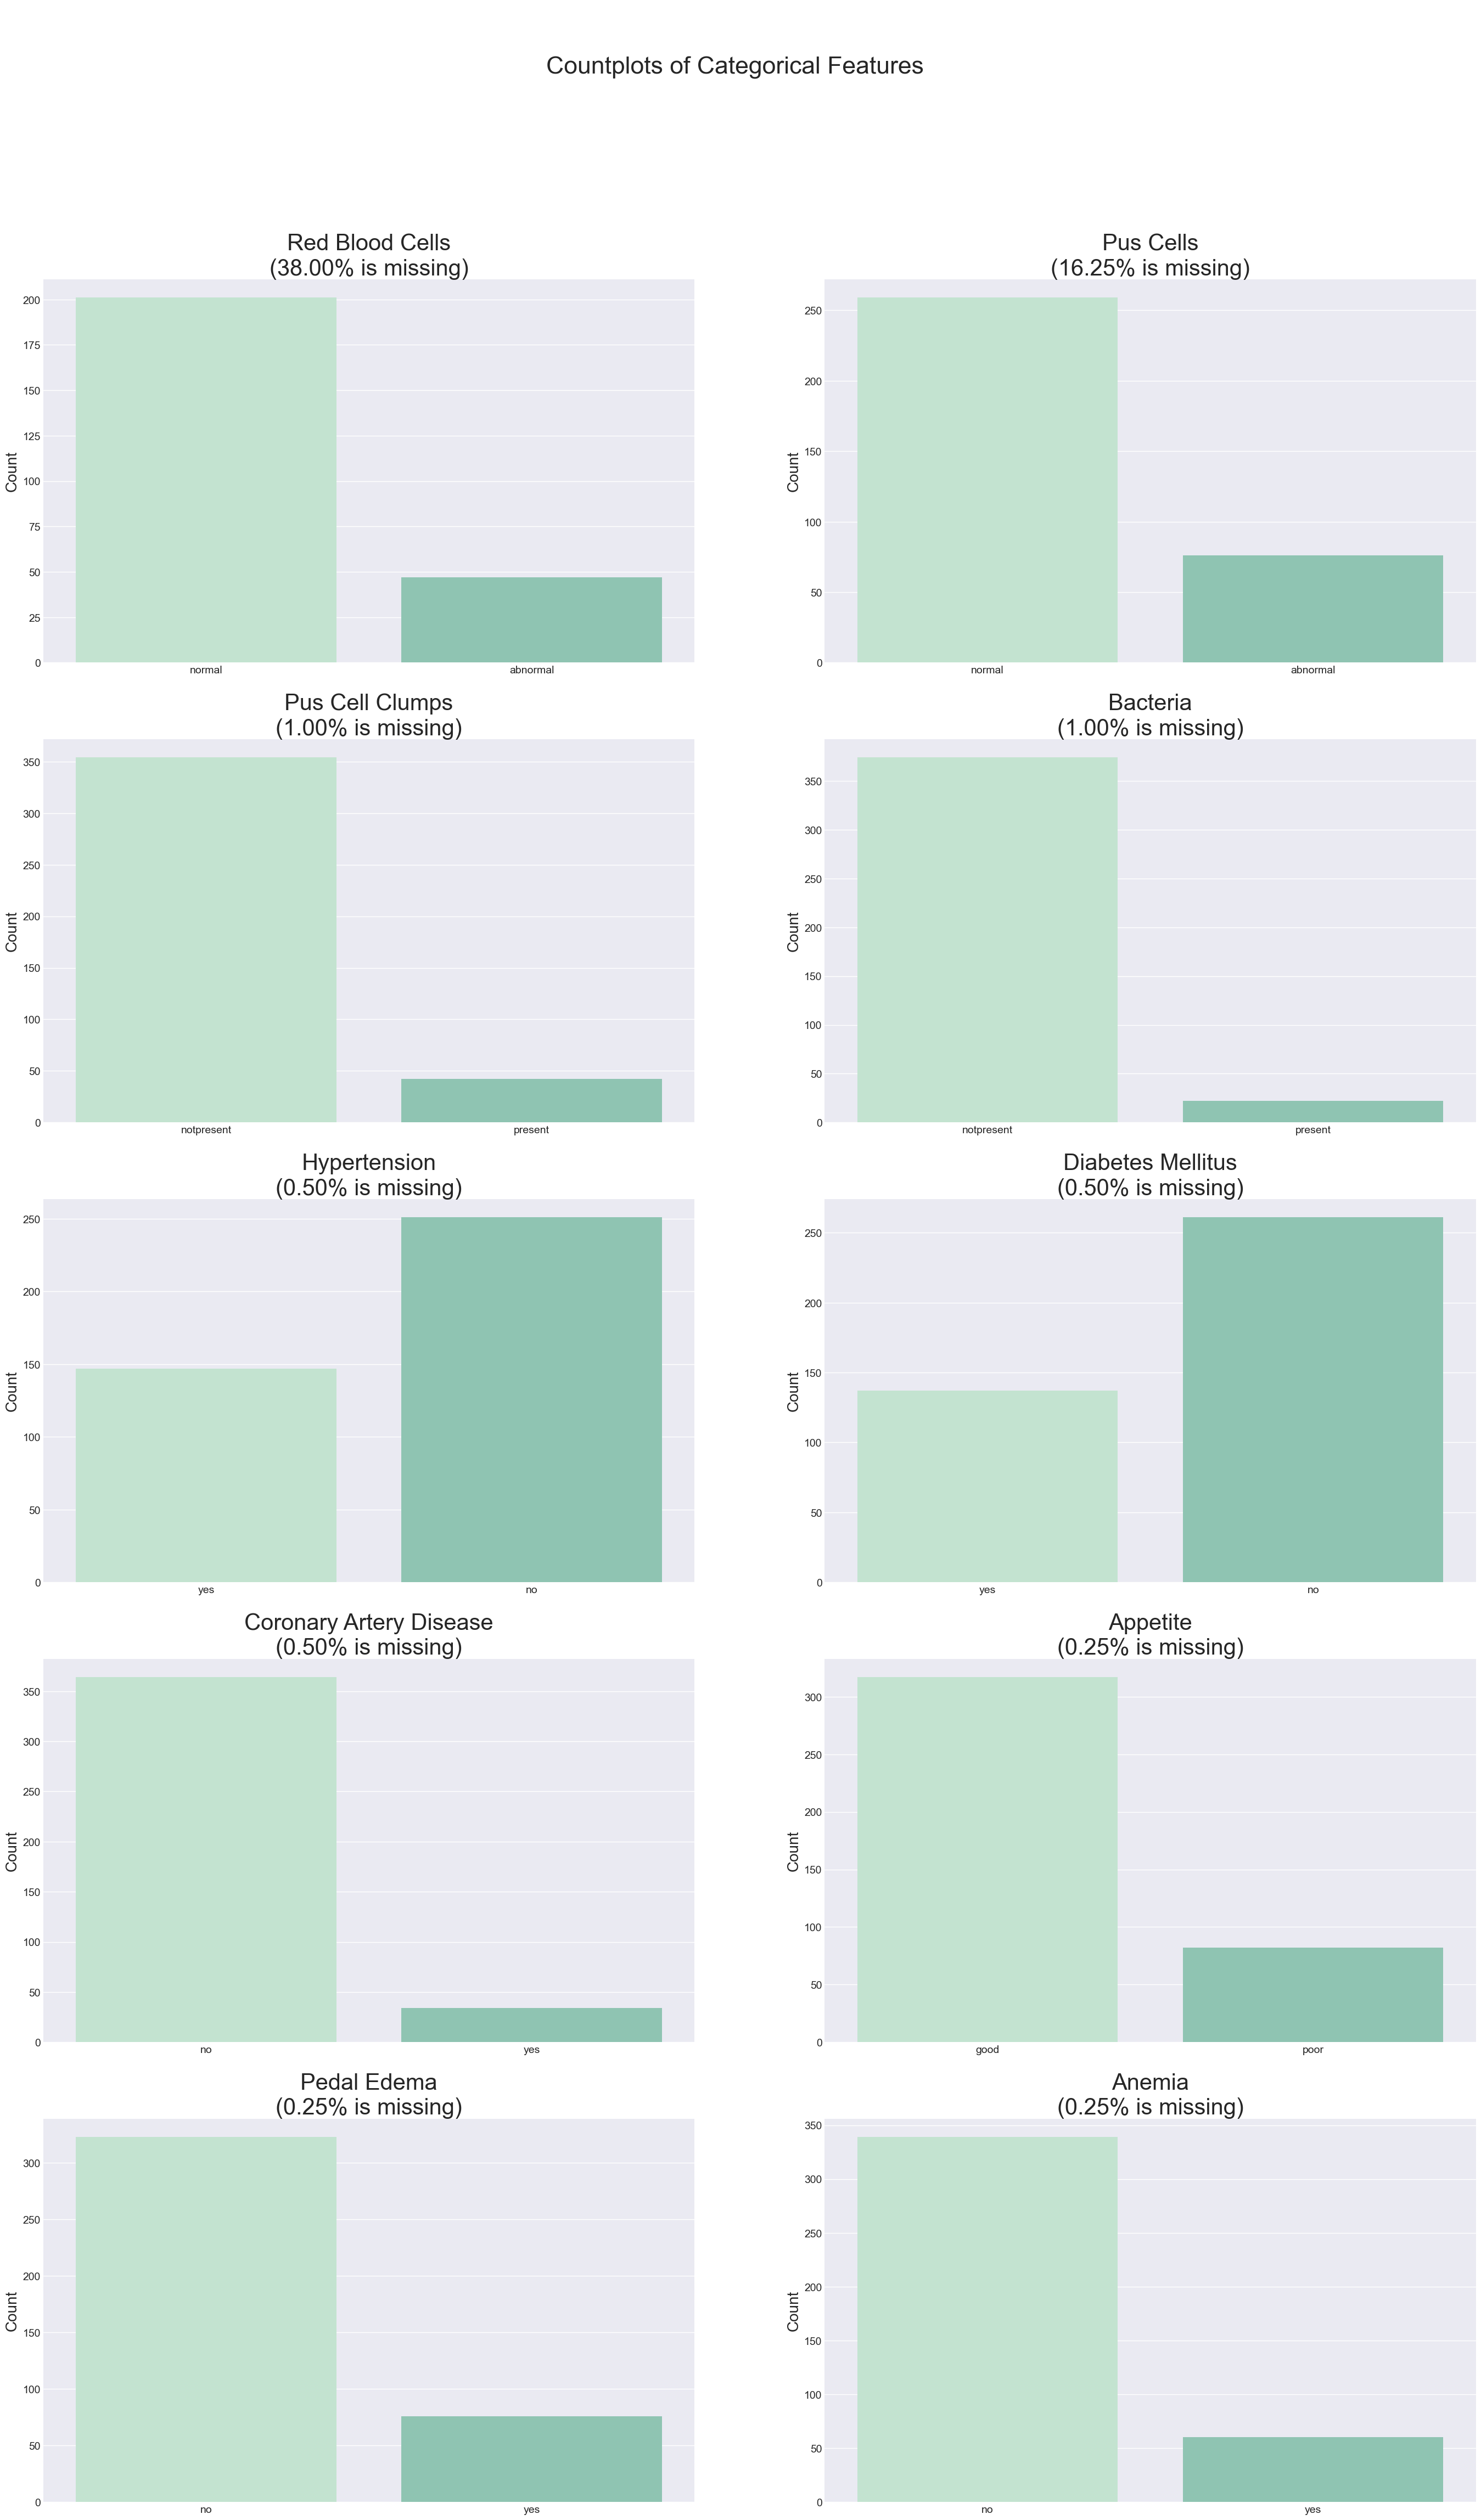

In [27]:
n_rows, n_cols = (5,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(30, 50))
figure.suptitle('\n\nCountplots of Categorical Features',fontsize=32)

for index, column in enumerate(categoricals):
    
    i,j = index // n_cols, index % n_cols
    
    miss_perc="%.2f"%(100*(1-(data[column].dropna().shape[0])/data.shape[0]))
    
    collabel=column+"\n({}% is missing)".format(miss_perc)
    
    fig = sns.countplot(x=column, data=data,label=collabel, palette=sns.cubehelix_palette(rot=-.35,light=0.85,hue=1),
    
    ax=axes[i,j])
    
    axes[i,j].set_title(collabel,fontsize=30)
    
    axes[i,j].set_xlabel(None)
    
    axes[i,j].set_ylabel("Count",fontsize=20)
    
    axes[i,j].set_xticklabels(axes[i,j].get_xticklabels())

plt.show()

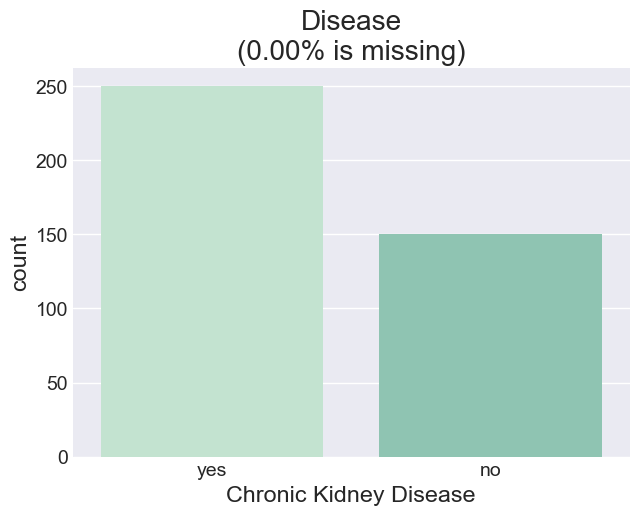

In [28]:
miss_perc="%.2f"%(100*(1-(data['Chronic Kidney Disease'].dropna().shape[0])/data.shape[0]))
    
label="Disease\n(missing:\n{}%)".format(miss_perc)
fig=sns.countplot(x=data['Chronic Kidney Disease'],label=label, palette=sns.cubehelix_palette(rot=-.35,light=0.85,hue=1))
plt.title("Disease\n({}% is missing)".format(miss_perc))
plt.show()

In [29]:
style.use('seaborn-darkgrid')

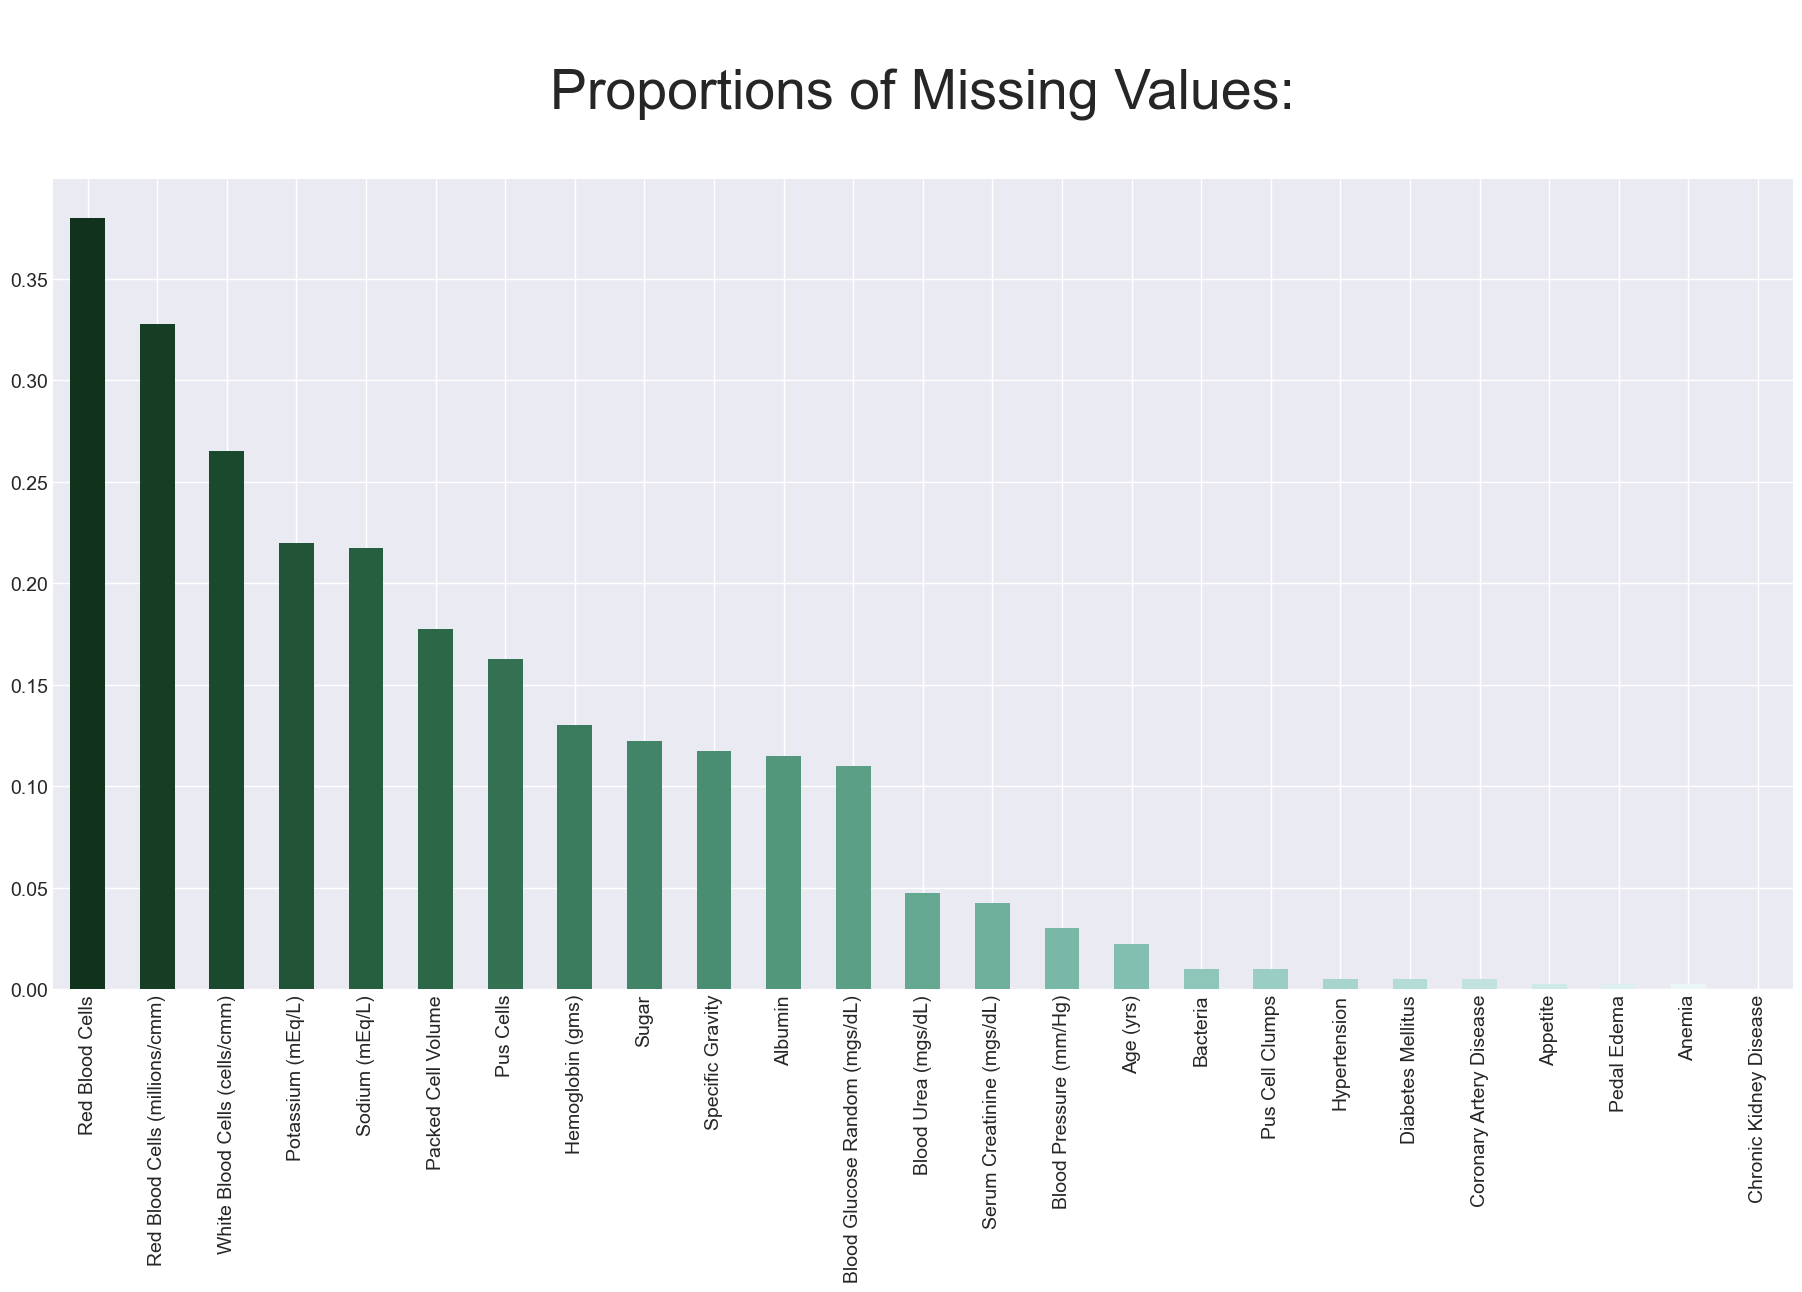

In [30]:
d=((data.isnull().sum()/data.shape[0])).sort_values(ascending=False)
d.plot(kind='bar',
       color=sns.cubehelix_palette(start=2,
                                    rot=0.15,
                                    dark=0.15,
                                    light=0.95,
                                    reverse=True,
                                    n_colors=24),
        figsize=(20,10))
plt.title("\nProportions of Missing Values:\n",fontsize=40)
plt.show()

### One-Hot Encoding